## Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
from tensorflow import keras
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Sequential, layers


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
seed = 42
tf.random.set_seed(seed)

In [ ]:
path = "/content/drive/MyDrive/yoga_pose"
train_path = path + '/Train'
test_path = path + '/Test'

## EDA

In [ ]:
yoga_category = []
images_count = []
train_yoga_category = []
train_data = []
val_yoga_category = []
val_data = []
test_yoga_category = []
test_data = []

In [ ]:

for pose in os.listdir(train_path):
    print(pose + " image count ----> " + str(len(os.listdir(train_path+'/'+ pose))))
    yoga_category.append(pose)
    images_count.append(len(os.listdir(train_path+'/'+pose)))    
print("Total count of the Images in the train Dataset : " + str(np.sum(images_count)))

Adho Mukha Svanasana image count ----> 50
Phalakasana image count ----> 50
Padmasana image count ----> 50
Vasisthasana image count ----> 50
Salamba Bhujangasana image count ----> 50
Utthita Hasta Padangusthasana image count ----> 68
Ustrasana image count ----> 50
Virabhadrasana Three image count ----> 50
Baddha Konasana image count ----> 50
Utkatasana image count ----> 50
Uttanasana image count ----> 50
Malasana image count ----> 50
Bakasana image count ----> 50
Paschimottanasana image count ----> 50
Vrksasana image count ----> 50
Ardha Matsyendrasana image count ----> 50
Garudasana image count ----> 50
Halasana image count ----> 50
Utthita Parsvakonasana image count ----> 50
Setu Bandha Sarvangasana image count ----> 49
Anjaneyasana image count ----> 50
Salamba Sarvangasana image count ----> 50
Urdhva Dhanurasana image count ----> 50
Virabhadrasana One image count ----> 49
Balasana image count ----> 50
Bitilasana image count ----> 50
Virabhadrasana Two image count ----> 50
Adho Mukha 

In [ ]:
images_count = []
for pose in os.listdir(test_path):
    print(pose + " image count ----> " + str(len(os.listdir(test_path+'/'+ pose))))
    yoga_category.append(pose)
    images_count.append(len(os.listdir(train_path+'/'+pose)))    
print("Total count of the Images in the test Dataset : " + str(np.sum(images_count)))

Phalakasana image count ----> 17
Malasana image count ----> 24
Baddha Konasana image count ----> 32
Adho Mukha Svanasana image count ----> 25
Salamba Bhujangasana image count ----> 13
Ustrasana image count ----> 47
Utthita Hasta Padangusthasana image count ----> 15
Padmasana image count ----> 28
Uttanasana image count ----> 22
Utkatasana image count ----> 32
Virabhadrasana Three image count ----> 20
Salamba Sarvangasana image count ----> 24
Anjaneyasana image count ----> 22
Paschimottanasana image count ----> 13
Vasisthasana image count ----> 60
Vrksasana image count ----> 19
Garudasana image count ----> 36
Bakasana image count ----> 63
Ardha Matsyendrasana image count ----> 47
Utthita Parsvakonasana image count ----> 20
Setu Bandha Sarvangasana image count ----> 18
Halasana image count ----> 22
Virabhadrasana One image count ----> 16
Balasana image count ----> 30
Virabhadrasana Two image count ----> 12
Adho Mukha Vrksasana image count ----> 16
Bitilasana image count ----> 45
Urdhva Mu

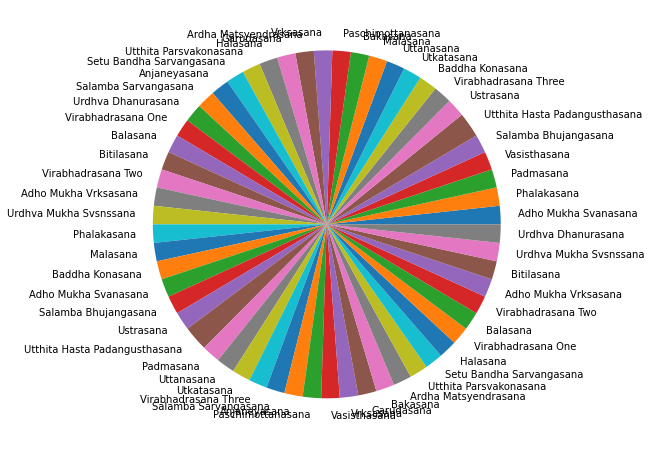

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(images_count, labels = yoga_category)
plt.show()

shape of the image is: (268, 527, 4)


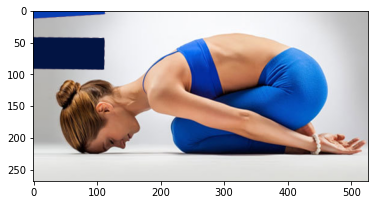

In [ ]:
# Visualise the original data
yoga_image = train_path + '/Balasana/' +  'File7.png'
print("shape of the image is:",imread(yoga_image).shape)
plt.imshow(imread(yoga_image))

In [ ]:
#split data to train and validate
import splitfolders
splitfolders.ratio(train_path, output="output", seed=42, ratio=(.8, 0.2) )

Copying files: 1466 files [17:45,  1.38 files/s]


In [ ]:
splitted_dir ='/content/output/'
#print("Train Data Count")

for pose in os.listdir(splitted_dir + 'train'):
    #print( pose + " images : " + str(len(os.listdir(splitted_dir+'train' + '/'+pose))))
    train_yoga_category.append(pose)
    train_data.append(len(os.listdir(splitted_dir + 'train' + '/'+pose)))    
print("Total Number of Training Images : " + str(np.sum(train_data)))



#print("Validation Data Count")

for pose in os.listdir(splitted_dir + 'train'):
   # print(pose + " images : " + str(len(os.listdir(splitted_dir+'val' + '/'+pose))))
    val_yoga_category.append(pose)
    val_data.append(len(os.listdir(splitted_dir + 'val' + '/'+pose)))    
print("Total Number of Validation Images : " + str(np.sum(val_data)))

Total Number of Training Images : 1172
Total Number of Validation Images : 294


In [ ]:
for pose in os.listdir(test_path):
   # print(pose + " images : " + str(len(os.listdir(splitted_dir+'val' + '/'+pose))))
    test_yoga_category.append(pose)
    test_data.append(len(os.listdir(test_path+ '/'+pose)))    
print("Total Number of Test Images : " + str(np.sum(test_data)))

Total Number of Test Images : 783


## CNN

In [ ]:
train_path = '/content/output/train/'
valid_path =  '/content/output/val'
test_path =  test_path

In [ ]:
image_size = 600
num_classes = len(train_yoga_category)
model = Sequential([
    layers.InputLayer(input_shape=[image_size, image_size, 3]),
    layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),    
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),     
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),    
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 600, 600, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 300, 300, 16)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 300, 300, 32)      4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 150, 150, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 64)      

In [ ]:
train_data = ImageDataGenerator(
    rescale = 1/255, # normalize the values
)

train_tot = train_data.flow_from_directory(
    train_path, 
    batch_size = 10,
    color_mode = 'rgb',
    class_mode = 'categorical',
    target_size = (image_size, image_size), 
    shuffle = True,
    seed = seed,
)

valid_data = ImageDataGenerator(
    rescale = 1/255, # normalize the values
)

valid_tot = valid_data.flow_from_directory(
    valid_path, 
    batch_size = 10,
    color_mode = 'rgb',
    class_mode = 'categorical',
    target_size = (image_size, image_size), 
    shuffle = True,
    seed = seed,
)

test_data = ImageDataGenerator(
    rescale = 1/255, # normalize the values
)

test_tot = test_data.flow_from_directory(
    test_path,
    batch_size = 10,
    color_mode = 'rgb',
    class_mode = 'categorical', 
    target_size = (image_size, image_size), 
    shuffle = True,
    seed = seed,

)


Found 1172 images belonging to 29 classes.
Found 294 images belonging to 29 classes.
Found 750 images belonging to 29 classes.


In [ ]:

early_stopping = EarlyStopping(
    min_delta=0.005, 
    patience=2, 
    restore_best_weights=True
)

history = model.fit(
    train_tot,
    validation_data = valid_tot,
    epochs = 25,
    callbacks = [early_stopping]
)

Epoch 1/25
118/118 [==============================] - 21s 163ms/step - loss: 4.7435 - accuracy: 0.0341 - val_loss: 3.3595 - val_accuracy: 0.0714
Epoch 2/25
118/118 [==============================] - 18s 153ms/step - loss: 3.2284 - accuracy: 0.1067 - val_loss: 2.7545 - val_accuracy: 0.2449
Epoch 3/25
118/118 [==============================] - 18s 153ms/step - loss: 2.1330 - accuracy: 0.4104 - val_loss: 2.2504 - val_accuracy: 0.4218
Epoch 4/25
118/118 [==============================] - 18s 154ms/step - loss: 0.8731 - accuracy: 0.7730 - val_loss: 2.0729 - val_accuracy: 0.4796
Epoch 5/25
118/118 [==============================] - 18s 150ms/step - loss: 0.4116 - accuracy: 0.8925 - val_loss: 2.3213 - val_accuracy: 0.4728
Epoch 6/25
118/118 [==============================] - 18s 152ms/step - loss: 0.2652 - accuracy: 0.9232 - val_loss: 2.3205 - val_accuracy: 0.4898


## CNN Evaluation and Plots

In [ ]:
results = model.evaluate(test_tot, batch_size=10)
print("test loss, test acc:", results)

75/75 [==============================] - 537s 7s/step - loss: 2.9949 - accuracy: 0.2800
test loss, test acc: [2.9948854446411133, 0.2800000011920929]


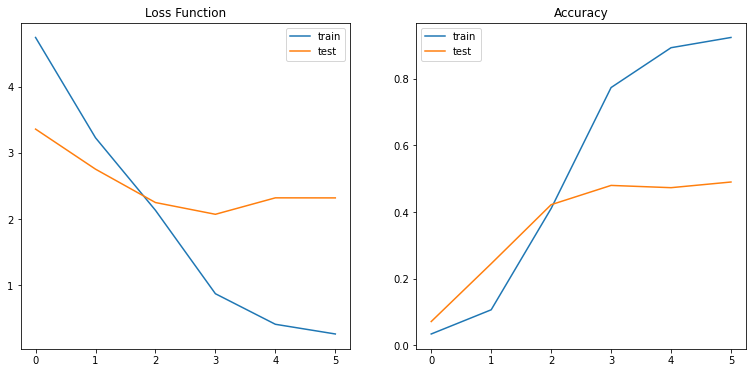

In [ ]:
plt.figure(figsize=(13, 6))

#loss function
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Loss Function')
plt.legend()

#accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Accuracy')
plt.legend()

plt.show()